In [7]:
import pickle
import numpy as np

In [8]:
EDGE_OP = 'mean'
IS_WEIGHTED = 'unweighted'
RESULTS_BASE_PATH = 'save'
AUC_TYPE = 'preds'

In [9]:
datasets = [
    {
        'name': 'ia_contact', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_contacts_hypertext_2009', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_enron_employees', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_radoslaw_email', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_email_eu', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'fb_forum', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'soc_sign_bitcoin_alpha', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'wiki_elections', 
        'context_window_size': 10, 
        'init_picker': 'Uniform', 
        'edge_picker': 'Exponential',
        'weighted_suffix': IS_WEIGHTED, 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    }
]

In [10]:
file_paths = [f'{RESULTS_BASE_PATH}/{dataset["name"]}_{dataset["edge_picker"]}_{dataset["init_picker"]}_{dataset["context_window_size"]}_{dataset["weighted_suffix"]}_{dataset["edge_op"]}_{dataset["is_directed"]}_{AUC_TYPE}.pkl' for dataset in datasets]

In [11]:
mean_aucs = []
mean_walk_times = []

for file_path in file_paths:
    result_for_dataset = pickle.load(open(file_path, 'rb'))
    
    mean_aucs.append({
        'new_temporal': np.mean(result_for_dataset['metrics']['new_temporal']['auc_scores']),
        'old_temporal': np.mean(result_for_dataset['metrics']['old_temporal']['auc_scores']),
        'node2vec': np.mean(result_for_dataset['metrics']['node2vec']['auc_scores'])
    })
    
    mean_walk_times.append({
        'new_temporal': np.mean(result_for_dataset['metrics']['new_temporal']['walk_times']),
        'old_temporal': np.mean(result_for_dataset['metrics']['old_temporal']['walk_times']),
        'node2vec': np.mean(result_for_dataset['metrics']['node2vec']['walk_times'])
    })

In [12]:
auc_new_temporal = [entry['new_temporal'] for entry in mean_aucs]
auc_old_temporal = [entry['old_temporal'] for entry in mean_aucs]
auc_node2vec = [entry['node2vec'] for entry in mean_aucs]

walk_new_temporal = [entry['new_temporal'] for entry in mean_walk_times]
walk_old_temporal = [entry['old_temporal'] for entry in mean_walk_times]
walk_node2vec = [entry['node2vec'] for entry in mean_walk_times]

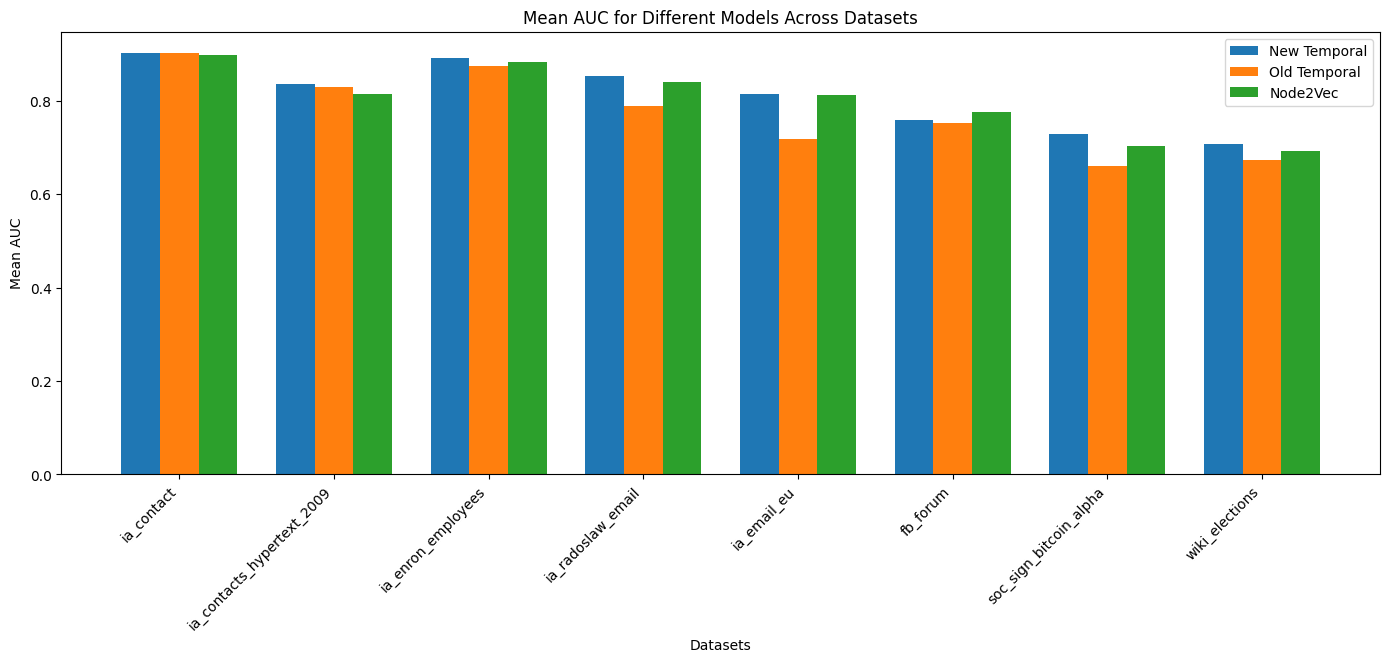

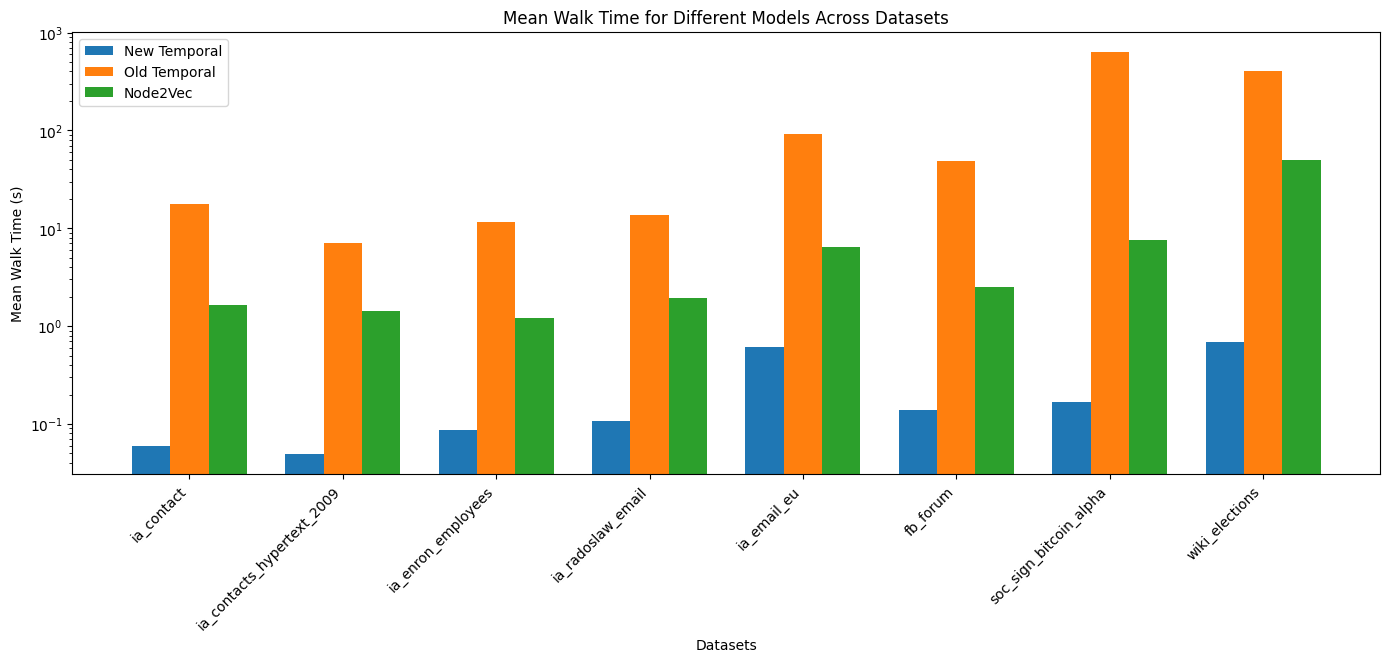

In [13]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.25
dataset_names = [dataset['name'] for dataset in datasets]
x = np.arange(len(datasets))

# Plotting AUC bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, auc_new_temporal, width=bar_width, label='New Temporal')
plt.bar(x, auc_old_temporal, width=bar_width, label='Old Temporal')
plt.bar(x + bar_width, auc_node2vec, width=bar_width, label='Node2Vec')

plt.xlabel('Datasets')
plt.ylabel('Mean AUC')
plt.title('Mean AUC for Different Models Across Datasets')
plt.xticks(x, dataset_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

# Plotting Walk Time bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, walk_new_temporal, width=bar_width, label='New Temporal')
plt.bar(x, walk_old_temporal, width=bar_width, label='Old Temporal')
plt.bar(x + bar_width, walk_node2vec, width=bar_width, label='Node2Vec')

plt.xlabel('Datasets')
plt.ylabel('Mean Walk Time (s)')
plt.title('Mean Walk Time for Different Models Across Datasets')
plt.xticks(x, dataset_names, rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

In [14]:
import pandas as pd

auc_df = pd.DataFrame({
    'Dataset': dataset_names,
    'AUC_New_Temporal': auc_new_temporal,
    'AUC_Old_Temporal': auc_old_temporal,
    'AUC_Node2Vec': auc_node2vec,
})

auc_df = auc_df.round(2)

walk_time_df = pd.DataFrame({
    'Dataset': dataset_names,
    'WalkTime_New_Temporal': walk_new_temporal,
    'WalkTime_Old_Temporal': walk_old_temporal,
    'WalkTime_Node2Vec': walk_node2vec
})
walk_time_df['Ratio_New_to_Old'] = (walk_time_df['WalkTime_Old_Temporal'] / walk_time_df['WalkTime_New_Temporal']).round(2)

walk_time_df = walk_time_df.round(2)

In [15]:
auc_df

,Dataset,AUC_New_Temporal,AUC_Old_Temporal,AUC_Node2Vec
0,ia_contact,0.90,0.90,0.90
1,ia_contacts_hypertext_2009,0.84,0.83,0.81
2,ia_enron_employees,0.89,0.88,0.88
3,ia_radoslaw_email,0.85,0.79,0.84
4,ia_email_eu,0.81,0.72,0.81
5,fb_forum,0.76,0.75,0.78
6,soc_sign_bitcoin_alpha,0.73,0.66,0.70
7,wiki_elections,0.71,0.67,0.69


In [16]:
walk_time_df

,Dataset,WalkTime_New_Temporal,WalkTime_Old_Temporal,WalkTime_Node2Vec,Ratio_New_to_Old
0,ia_contact,0.06,17.50,1.64,295.93
1,ia_contacts_hypertext_2009,0.05,6.99,1.44,142.77
2,ia_enron_employees,0.09,11.60,1.21,134.95
3,ia_radoslaw_email,0.11,13.62,1.95,125.59
4,ia_email_eu,0.61,92.72,6.37,153.01
5,fb_forum,0.14,49.13,2.50,356.11
6,soc_sign_bitcoin_alpha,0.17,633.48,7.50,3784.38
7,wiki_elections,0.69,404.96,49.82,582.80


In [17]:
alternate_datasets = [
    {
        'name': 'ia_contact',
        'alias': 'contact',
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_contacts_hypertext_2009', 
        'alias': 'hyper',
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_enron_employees', 
        'alias': 'enron',
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_radoslaw_email',
        'alias': 'rado',
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': IS_WEIGHTED, 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    }
]

In [18]:
alternate_dataset_results = {}

for dataset in alternate_datasets:
    dataset_name = dataset['name']
    dataset_result = {}
    
    for variant in dataset['variants']:
        file_path = f'{RESULTS_BASE_PATH}/{dataset_name}_{variant["edge_picker"]}_{variant["init_picker"]}_{variant["context_window_size"]}_{variant["weighted_suffix"]}_{variant["edge_op"]}_{variant["is_directed"]}_{AUC_TYPE}.pkl'
        result_for_variant = pickle.load(open(file_path, 'rb'))
        dataset_result[f'{variant["init_picker"]}_{variant["edge_picker"]}'] = {
            'new_temporal': np.mean(result_for_variant['metrics']['new_temporal']['auc_scores']),
            'old_temporal': np.mean(result_for_variant['metrics']['old_temporal']['auc_scores']),
            'node2vec': np.mean(result_for_variant['metrics']['node2vec']['auc_scores'])
        }
        
    alternate_dataset_results[dataset['alias']] = dataset_result

In [19]:
import pandas as pd

table_rows = []

for dataset_name, variants in alternate_dataset_results.items():
    for variant_name, metrics in variants.items():
        init_picker, edge_picker = variant_name.split('_')
        
        table_rows.append({
            'F_s': init_picker,
            'F_Gamma': edge_picker,
            f'{dataset_name} (New)': round(metrics['new_temporal'], 3),
            f'{dataset_name} (Old)': round(metrics['old_temporal'], 3),
        })

df = pd.DataFrame(table_rows)

df = df.groupby(['F_s', 'F_Gamma'], as_index=False).first()

desired_order = [
    ('Uniform', 'Uniform'),
    ('Uniform', 'Linear'),
    ('Linear', 'Uniform'),
    ('Linear', 'Linear')
]

df['sort_key'] = df.apply(lambda row: desired_order.index((row['F_s'], row['F_Gamma'])), axis=1)
df = df.sort_values('sort_key').drop(columns='sort_key').reset_index(drop=True)

In [20]:
df

,F_s,F_Gamma,contact (New),contact (Old),hyper (New),hyper (Old),enron (New),enron (Old),rado (New),rado (Old)
0,Uniform,Uniform,0.920,0.899,0.814,0.840,0.889,0.895,0.814,0.808
1,Uniform,Linear,0.913,0.897,0.828,0.840,0.898,0.890,0.822,0.808
2,Linear,Uniform,0.920,0.899,0.820,0.840,0.891,0.890,0.812,0.809
3,Linear,Linear,0.911,0.896,0.829,0.834,0.893,0.890,0.822,0.798


In [21]:
alibaba_dataset = {
    'name': 'alibaba', 
    'context_window_size': 10, 
    'init_picker': 'Uniform', 
    'edge_picker': 'Exponential',
    'weighted_suffix': 'unweighted', 
    'edge_op': 'hadamard', 
    'is_directed': 'directed'
}

In [22]:
alibaba_filepath = f'save/{alibaba_dataset["name"]}_{alibaba_dataset["edge_picker"]}_{alibaba_dataset["init_picker"]}_{alibaba_dataset["context_window_size"]}_{alibaba_dataset["weighted_suffix"]}_{alibaba_dataset["edge_op"]}_{alibaba_dataset["is_directed"]}.pkl'
alibaba_results_data = pickle.load(open(alibaba_filepath, 'rb'))

In [23]:
alibaba_results = {
    'AUC': {
        'new_temporal': np.mean(alibaba_results_data['metrics']['new_temporal']['auc_scores']),
        'old_temporal': np.mean(alibaba_results_data['metrics']['old_temporal']['auc_scores']),
        'node2vec': np.mean(alibaba_results_data['metrics']['node2vec']['auc_scores'])
    },
    'Walk Times': {
        'new_temporal': np.mean(alibaba_results_data['metrics']['new_temporal']['walk_times']),
        'old_temporal': np.mean(alibaba_results_data['metrics']['old_temporal']['walk_times']),
        'node2vec': np.mean(alibaba_results_data['metrics']['node2vec']['walk_times'])
    }
}

In [24]:
alibaba_df = pd.DataFrame(alibaba_results).T

In [25]:
alibaba_df

,new_temporal,old_temporal,node2vec
AUC,0.981842,0.500000,0.957631
Walk Times,32.954665,16533.862519,3.037064
